<a href="https://www.analytiksinc.com">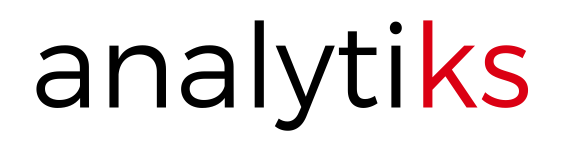</a>
<p style="text-align: right;"> © 2018. Analytiks Inc. </p>

# EXERCISE: ENSEMBLE MODEL

## Import Libraries

### Standard Libraries

In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Additional Libraries

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


#Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Ensemble Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#Classification Metrics
from sklearn.metrics import accuracy_score



In [42]:
from sklearn.exceptions import DataConversionWarning

import warnings
warnings.filterwarnings("ignore", category=DataConversionWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

## Load and Explore the Dataset

Credit Scoring
<br>
*filename: crx_proc.csv*

Load the Dataset

In [43]:
df = pd.read_csv('crx_proc.csv')

View the Dataset

In [44]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


Check the number of observations and features

In [45]:
df.shape

(690, 16)

Check Dtypes and Null Values


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1        678 non-null object
A2        678 non-null float64
A3        690 non-null float64
A4        684 non-null object
A5        684 non-null object
A6        681 non-null object
A7        681 non-null object
A8        690 non-null float64
A9        690 non-null object
A10       690 non-null object
A11       690 non-null int64
A12       690 non-null object
A13       690 non-null object
A14       677 non-null float64
A15       690 non-null int64
Target    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


## Preprocessing

### Remove Null Values

In [47]:
df.isnull().sum()

A1        12
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
Target     0
dtype: int64

In [48]:
df_no_na = df.dropna()

Check Number of Remaining Samples

In [49]:
df_no_na.shape

(653, 16)

### Split Features and Target

In [50]:
X = df_no_na.drop(['Target'], axis=1)
y = df_no_na.Target

### Convert Categorical Data to Numerical

In [51]:
X_num = pd.get_dummies(X)

In [52]:
X_num.shape

(653, 46)

### Generate the training and validation set with the following conditions
* Use the "train_test_split" function with these parameters:
    * test_size = 0.30
    * random_state = 123

* Use these variable names:
    * X_train
    * y_train
    * X_val
    * y_val

In [53]:
X_train,X_val,y_train,y_val=train_test_split(X_num, y, test_size=0.30, random_state=123)

Verify the shapes of each variable to make sure it was properly assigned

In [54]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((457, 46), (457,), (196, 46), (196,))

Check value counts of target variable for both training and validation set

In [55]:
y_train.value_counts()

-    250
+    207
Name: Target, dtype: int64

In [56]:
y_val.value_counts()

-    107
+     89
Name: Target, dtype: int64

## Classification Algorithms

Build multiple classifiers

* Use the make_pipeline function
* Every algorithm should go through the pipeline (MinMaxScaler, Classifier) 
* For each classifier, get the accuracy score on the validation test set

In [57]:
scaler = MinMaxScaler()

### Logistic Regression

#### Build a Logistic Regression Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, LogisticRegression)
* Get accuracy score for the validation set

In [58]:
lr_clf = LogisticRegression(random_state=123)
lr_clf_pl = Pipeline(steps=[('scaler', scaler), ('clf', lr_clf)])
lr_clf_pl.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [59]:
y_pred_lr = lr_clf_pl.predict(X_val)

In [60]:
accuracy_score(y_val, y_pred_lr)

0.8877551020408163

### Decision Tree

#### Build a Decision Tree Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, DecisionTree)
* Get accuracy score for the validation set

In [61]:
dt_clf = DecisionTreeClassifier(random_state=123)
dt_clf_pl = Pipeline(steps=[('scaler', scaler), ('clf', dt_clf)])
dt_clf_pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'))])

In [62]:
y_pred_dt = dt_clf_pl.predict(X_val)

In [63]:
accuracy_score(y_val, y_pred_dt)

0.8418367346938775

## Ensemble Models

### Random Forest

#### Build a Random Forest Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, RandomForestClassifier)
* Get accuracy score for the validation set

In [64]:
rf_clf = RandomForestClassifier(random_state=123)
rf_clf_pl = Pipeline(steps=[('scaler', scaler), ('clf', rf_clf)])
rf_clf_pl.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [65]:
y_pred_rf = rf_clf_pl.predict(X_val)

In [66]:
accuracy_score(y_val, y_pred_rf)

0.8826530612244898

#### Get Feature Importance from the RandomForest Classifier
Display the Top 5 Features

In [67]:
feature_importance = rf_clf_pl.steps[1][1].feature_importances_

In [68]:
feature_importance_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Importance'])

In [69]:
feature_importance_df.sort_values('Importance', ascending=False).head()

,Importance
A9_t,0.249266
A9_f,0.153408
A8,0.079486
A14,0.068543
A3,0.062981


#### Perform Hyper Parameter Optimization on the Random Forest Classifier
* Choose either Grid Search or Random Search with the following parameters:
    * cv=5
    * refit=True
* Optimize the following parameters:
    * max_depth
    * max_features
    * min_samples_split
    * min_samples_leaf
    * bootstrap
    * criterion
* Get Accuracy Score for validation set

Build the Model

In [70]:
param_grid = {"max_depth": [3,10, 20],
              "max_features": [1, 10, 12],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [71]:
grid_search_clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

grid_search_clf_pl = Pipeline(steps=[('scaler', scaler), ('clf', grid_search_clf)])

grid_search_clf_pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurit...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))])

In [72]:
grid_search_clf_pl.steps[1][1].best_score_

0.8774617067833698

In [73]:
y_pred_rf_grid = grid_search_clf_pl.predict(X_val)

In [74]:
accuracy_score(y_val, y_pred_rf_grid)

0.8877551020408163

### GBM

#### Build a GBM Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, GBM)
* Get accuracy score for the validation set

In [78]:
gbm_clf = GradientBoostingClassifier(random_state=123)
gbm_clf_pl = Pipeline(steps=[('scaler', scaler), ('clf', gbm_clf)])
gbm_clf_pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))])

In [79]:
y_pred_gbm = gbm_clf_pl.predict(X_val)

In [80]:
accuracy_score(y_val, y_pred_gbm)

0.8877551020408163

### VOTING

#### Build a Voting Classifier
* Use the following estimators:
    * Logistic Regression
    * Random Forest
    * GBM
* Choose either 'hard' or 'soft' voting
* Use a pipeline (MinMaxScaler, Voting)
* Get accuracy score for the validation set

In [81]:
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('rf', rf_clf), ('gbm', gbm_clf)], voting='hard')
voting_clf_pl = Pipeline(steps=[('scaler', scaler), ('clf', voting_clf)])
voting_clf_pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12...      warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None))])

In [83]:
y_pred_voting_hard = voting_clf_pl.predict(X_val)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [84]:
accuracy_score(y_val, y_pred_voting_hard)

0.8928571428571429